# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Homework 2 - Clustering




**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors**: Mark Glickman, Pavlos Protopapas, & Chris Tanner 


<hr style="height:2pt">

### Homework 2 is due February 20th

In [1]:
#PLEASE RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- This is individual homework - No collaboration/Groups
- Problem 1 + Problem 2 = 75 points ; Problem 3 = 25 points
- To submit your assignment, please follow the instructions on Canvas.
- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

### Please use the libraries below:

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import preprocessing

from sklearn.cluster import KMeans
from gap_statistic import OptimalK
#from sklearn.datasets.samples_generator import make_blobs


<hr style="height:2pt">

<div class="theme">*Handy* Algorithms </div>


    
In this assignment, you will be working with data collected from a motion capture camera system. The system was used to record 14 different users performing 5 distinct hand postures with markers attached to a left-handed glove. A set of markers on the back of the glove was used to establish a local coordinate system for the hand, and 8 additional markers were attached to the thumb and fingers of the glove. A total of 24 features were collected based on observations from the camera system. Two other variables in the dataset were the ID of the user and the posture that the user made.

These data have been preprocessed, including transformation to the local coordinate system of the record, removal of outliers, and removal of missing data.

The dataset `postures_clean.csv` contains 38,943 rows and 26 columns. Each row corresponds to a single frame as captured by the camera system. The data are represented in the following manner:

`Class (type: Integer). The hand posture of the given observation, with`

`1 = Fist (with thumb out)`

`2 = Stop (hand flat)`

`3 = Point1 (point with index finger)`

`4 = Point2 (point with index and middle fingers)`

`5 = Grab (fingers curled as if to grab)`

`User (type: Integer). The ID of the user that contributed the record.`

`X0, Y0, Z0, X1, Y1, Z1,..., X7, Y7, Z7 (type: Real). The x-coordinate, y-coordinate, and z-coordinate of the eight unlabeled marker positions.`


Start by reading the dataset into a pandas data frame.

In [3]:
#your code here
df = pd.read_csv("data/postures_clean.csv")

<div class='exercise'>Problem 1: Clustering with k-means </div>

(a) After appropriate pre-processing (but not scaling) run the k-means clustering algorithm, using the `KMeans` class from sklearn.cluster, with the number of clusters corresponding to the number of users, `n_init` of 46, and 109 as the random seed. Add the result as a new column called `Cluster14` to your data frame.

In [4]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()


Series([], dtype: float64)

In [5]:
df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
count,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,...,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000
mean,3.533986,8.149501,51.392252,93.748418,-18.956761,48.644293,97.228337,-16.921813,46.432265,97.351512,...,-18.446645,45.392642,93.295433,-19.125065,45.201114,90.839851,-19.920157,44.463433,88.463343,-20.368719
std,1.332452,4.587195,34.070402,40.145995,34.976568,34.922596,38.076977,34.671422,36.395332,37.470755,...,35.597032,37.104094,39.746619,35.602273,37.556616,40.227409,34.827888,38.378395,40.503378,33.943957
min,1.000000,0.000000,-108.552738,-67.157904,-120.284665,-111.685241,-65.758453,-120.290858,-99.917453,-64.830342,...,-157.199089,-99.014815,-64.282645,-118.328399,-100.084275,-67.283707,-153.449813,-108.605639,-64.972157,-113.733105
25%,2.000000,5.000000,28.169252,74.946345,-43.598807,22.574182,79.747406,-41.210343,17.617698,81.302159,...,-45.169035,15.849890,76.376404,-46.363837,15.132050,68.915784,-46.547792,13.081363,63.541846,-45.676522
50%,4.000000,9.000000,54.596564,93.966079,-15.041397,52.960933,96.690641,-12.046916,51.184849,97.222693,...,-14.823751,50.160084,97.040377,-16.010237,49.968499,95.562441,-17.101080,49.601058,93.796334,-19.428819
75%,5.000000,12.000000,77.390834,130.932659,7.998678,75.560564,131.729311,9.065824,74.435194,130.794462,...,9.382799,73.761617,126.844621,9.031498,74.558859,123.069653,7.767866,75.721811,119.188963,6.591351
max,5.000000,14.000000,160.850926,169.175464,113.345119,158.783454,170.209350,104.697852,163.547310,168.186466,...,119.237203,180.563322,167.926171,110.898899,176.409004,168.598384,117.914907,189.221529,169.127359,117.815967


In [6]:
df['User'].value_counts(), df['Class'].value_counts()

(14    5445
 10    4389
 11    3777
 0     3641
 5     3299
 9     3262
 13    3141
 6     2860
 8     2746
 1     2381
 2     1917
 12    1860
 7      150
 4       75
 Name: User, dtype: int64, 5    14900
 2    14668
 4     5767
 3     3556
 1       52
 Name: Class, dtype: int64)

In [8]:
#your code here
ms_kmeans = KMeans(n_clusters=14, init='random', n_init=46, random_state=109).fit(df)
df['Cluster14']=ms_kmeans.labels_

(b) Use the function below to visualize the results for k-means on a random sample of 2,000 observations (it will take the sample for you). Does 14 clusters seem to make sense?

In [9]:
from sklearn.decomposition import PCA

def plot_clusters(full_data, group_col, scaling_mode):
    marker_types = [".", "v", "1", "^", "s", "p", "P", "3", "H", "<", "|", "_", "x", "*"]
    marker_colors = np.concatenate([np.array(plt.cm.tab10.colors),np.array(plt.cm.Pastel1.colors)])
    
    feature_columns = [colname for colname in list(full_data.columns) if colname not in {'Class','User','Cluster14','Cluster5'}]
    features_only = full_data[feature_columns]
    
    # make a scaled df if needed, (but don't scale cluster labels)
    if scaling_mode == True:
        scaler = StandardScaler()
        scaled_features = pd.DataFrame(scaler.fit_transform(features_only), columns=feature_colummns)
    elif scaling_mode == False:
        scaled_features = features_only
    else:
        raise ValueError("Unexpected value for scaling_mode")

    # fit PCA to the whole scaled data
    fitted_pca = PCA().fit(scaled_features)

    # take a sample of the whole scaled data
    scaled_sample = scaled_features.sample(2000, random_state=109)

    # apply the PCA transform on the sample
    pca_sample = pd.DataFrame(fitted_pca.transform(scaled_sample), columns = ["PCA{}".format(i) for i in range(len(scaled_sample.columns.values))])
    pca_sample.index = scaled_sample.index ### New statement
    
    # re-include a cluster label for the pca data
    if 'Cluster14' in full_data.columns.values:
        pca_sample['Cluster14'] = full_data.loc[pca_sample.index, "Cluster14"]
    if 'Cluster5' in full_data.columns.values:
        pca_sample['Cluster5'] = full_data.loc[pca_sample.index, "Cluster5"]
    
    plt.figure(figsize=(11,8.5))
    for i, (cluster_id, cur_df) in enumerate(pca_sample.groupby([group_col])):

        pca1_scores = cur_df.iloc[:,0]
        pca2_scores = cur_df.iloc[:,1]
        plt.scatter(pca1_scores, pca2_scores, label=cluster_id, c=marker_colors[i].reshape(1,-1), marker=marker_types[i])

    plt.xlabel("PC1 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[0],1)))
    plt.ylabel("PC2 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[1],1)))
    plt.legend()
    plt.show()

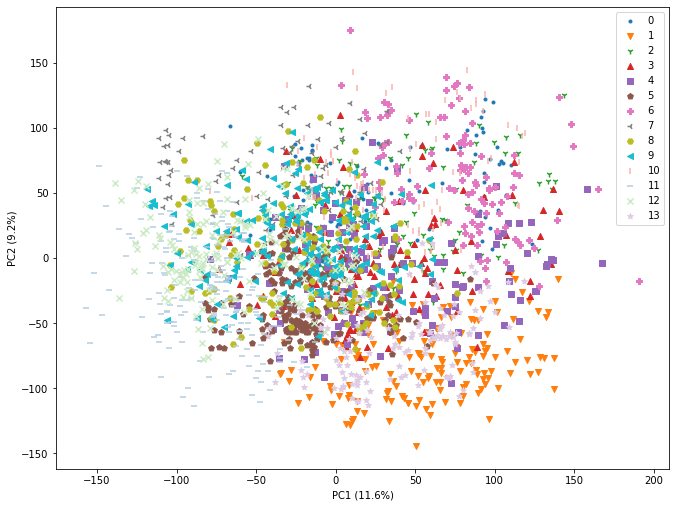

In [10]:
#your code here
plot_clusters(df, df['Cluster14'], scaling_mode=False)

**response here**

Based on the first two principal components, there are broad groupings, but it looks like there is significant overlap between the clusters. We go from 20 features to 2 features, so it is likely that we aren't able to visualize a lot of what is happening in the model. I.e. we would not expect to be able to visualize differences when we are only seeing 20% of variation in 2 PCs. 

(c) Plot the silhouette scores using the function below, from lecture. Give it a 10% sample of the data to speed the visualization. How reasonable does the clustering seem based on this plot? How does it compare to the information in the plot above?

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
#modified code from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

def silplot(X, cluster_labels, clusterer, pointlabels=None):
    n_clusters = clusterer.n_clusters
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(11,8.5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters,
          ", the average silhouette_score is ", silhouette_avg,".",sep="")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(0,n_clusters+1):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    xs = X[:, 0]
    ys = X[:, 1]
    
    if pointlabels is not None:
        for i in range(len(xs)):
            plt.text(xs[i],ys[i],pointlabels[i])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % int(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [12]:
feature_columns = [colname for colname in list(df.columns) if colname not in {'Class','User','Cluster14','Cluster5'}]
features_only_sample = df[feature_columns].sample(round(len(df)*0.1), random_state=109)
cluster_preds_14 = df['Cluster14'].sample(round(len(df)*0.1), random_state=109)
df_sample = df.sample(round(len(df)*0.1), random_state=109)


For n_clusters = 14, the average silhouette_score is 0.06523694497722157.


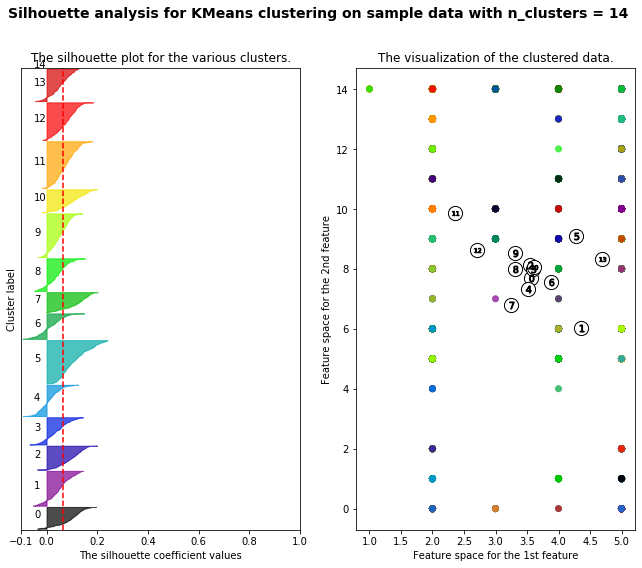

In [13]:
#your code here
silplot(df_sample.values, cluster_preds_14, ms_kmeans, pointlabels=None)


How reasonable does the clustering seem based on this plot? How does it compare to the information in the plot above?

**response here**
Based on the user and hand type features, we are mainly seeing overlap between the cluster centers. There is probably an issue because we have about 14,000 hand type 2's and 5's in our data, so the centers are ending up somewhere in the middle. None seem to be capturing the fist hand type. This seems similar to the information in the PCA clustering graph.


(d) Repeat all of the above steps, but attempting to group by posture rather than by user. That is : 

(i) Run the k-means algorithm with 5 centroids instead of 14, creating a variable named `Cluster5` and adding it to the dataset. 

(ii) Visualize the results for k-means. Does 5 clusters seem to make sense from this plot?

(iii) Plot the silhouette scores on a 10% sample of the data. How reasonable does the clustering seem based on this plot?

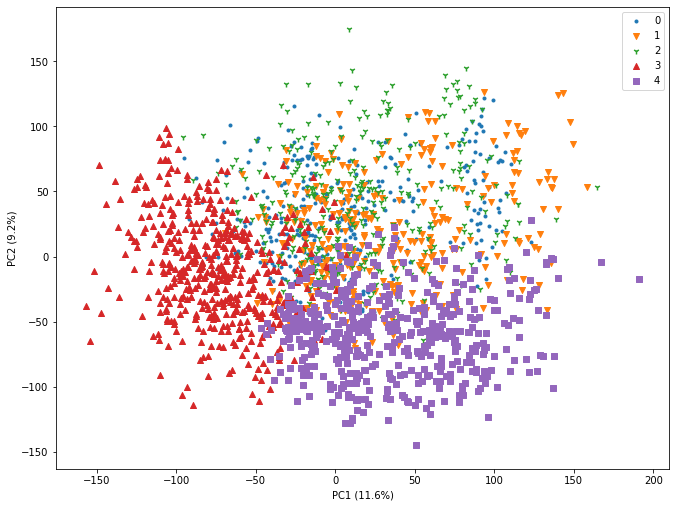

In [14]:
#your code here
ms_kmeans_five = KMeans(n_clusters=5, init='random', n_init=46, random_state=109).fit(df)
df['Cluster5']=ms_kmeans_five.labels_
plot_clusters(df, df['Cluster5'], scaling_mode=False)

**response here**

Two of the clusters appear to have good differentiation. The remaining three show up in very similar overlapping space. Again, this is due to the dimension reduction from 20 features to 2 features. We wouldn't expect to see clean groupings with this much variation gone. 

For n_clusters = 5, the average silhouette_score is 0.06982155300638099.


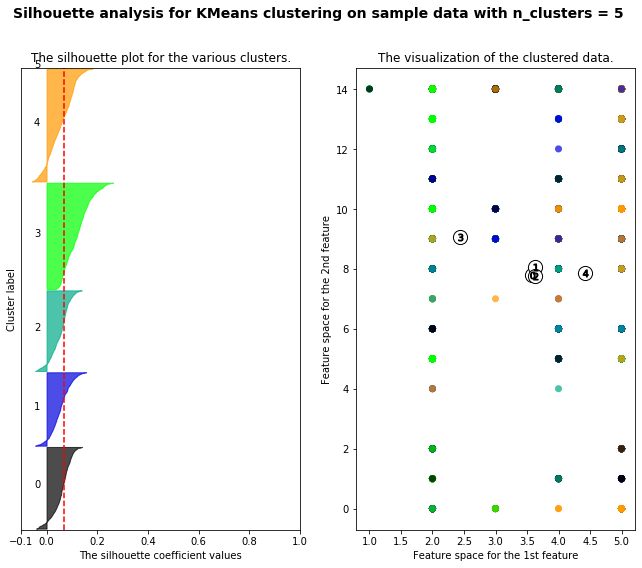

In [15]:
#your code here
cluster_preds_5 = df['Cluster5'].sample(round(len(df)*0.1), random_state=109)
silplot(df_sample.values, cluster_preds_5, ms_kmeans_five, pointlabels=None)


**response here**

5 clusters gets a slightly better average silhouette score, but the score is still fairly low. 3 of the cluster centers appear completely overlapped, so it is fair to think the clusters aren't giving us useful separation on the hand gesture types. 

(e) What do the results suggest? Does this make sense in the context of what we know about the problem?

**response here**

These results suggest that five clusters perform better than fourteen. However, it is not making sense given what we know about the problem. The cluster centers are not pointing towards the 5 hand gesture types but are instead grouping towards the middle. They are likely better at differentiating between the 2 and 5 hand gesture types, which is where the vast majority of data is.

<div class='exercise'> <b> Problem 2: Other Ks  </b> </div>

In the previous problem, we examined the results of running k-means with 5 and 14 centroids on the postures data. In this problem, we will investigate a broader range of possible cluster sizes, with a borader range of metrics. 

**For all of these questions, you should work with a sample of 2,000 data points drawn with `pd.sample` and a random seed of 109.**

(a) Use the elbow method to evaluate the best choice of the number of clusters, plotting the total within-cluster variation against the number of clusters, for k-means clustering with $k \in \{1,2,...,15\}.$
 

In [16]:
feature_columns = [colname for colname in list(df.columns) if colname not in {'Class','User','Cluster14','Cluster5'}]
df_sample_q2 = df[feature_columns].sample(2000, random_state=109)


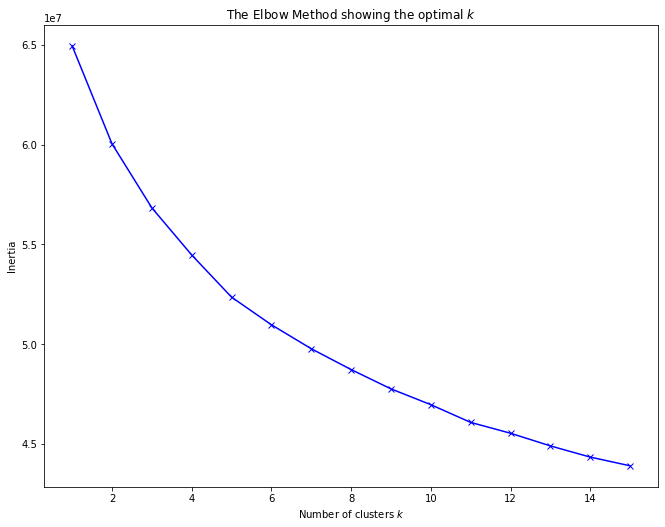

In [17]:
#your code here

wss = []
for i in range(1,16):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(df_sample_q2)
    wss.append(fitx.inertia_)

plt.figure(figsize=(11,8.5))
plt.plot(range(1,16), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

(b) Use the average silhouette to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,...,15\}$. Plot the results. 

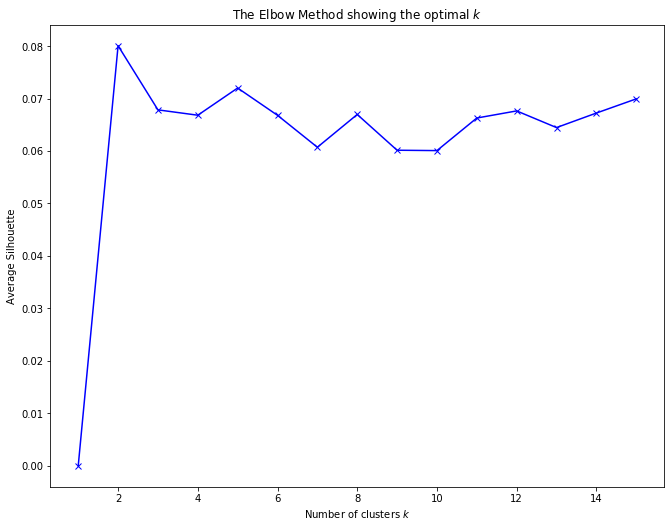

In [18]:
#your code here

from sklearn.metrics import silhouette_score

scores = [0]
for i in range(2,16):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(df_sample_q2)
    score = silhouette_score(df_sample_q2, fitx.labels_)
    scores.append(score)
    
plt.figure(figsize=(11,8.5))
plt.plot(range(1,16), np.array(scores), 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

(c) Use the gap statistic to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,..,15\}$. Plot the results. 

In [19]:
def display_gapstat_with_errbars(gap_df):
    gaps = gap_df["gap_value"].values
    diffs = gap_df["diff"]
    
    err_bars = np.zeros(len(gap_df))
    err_bars[1:] = diffs[:-1] - gaps[:-1] + gaps[1:]

    plt.scatter(gap_df["n_clusters"], gap_df["gap_value"])
    plt.errorbar(gap_df["n_clusters"], gap_df["gap_value"], yerr=err_bars, capsize=6)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Gap Statistic")
    plt.show()
    


Optimal clusters:  14


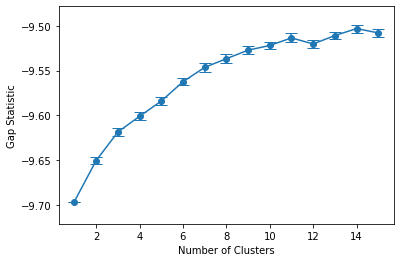

In [20]:
#your code here
from gap_statistic import OptimalK
from sklearn.datasets.samples_generator import make_blobs

gs_obj = OptimalK()

n_clusters = gs_obj(df_sample_q2.values, n_refs=50, cluster_array=np.arange(1, 16))
print('Optimal clusters: ', n_clusters)

display_gapstat_with_errbars(gs_obj.gap_df)


For n_clusters = 9, the average silhouette_score is 0.06007386138291098.


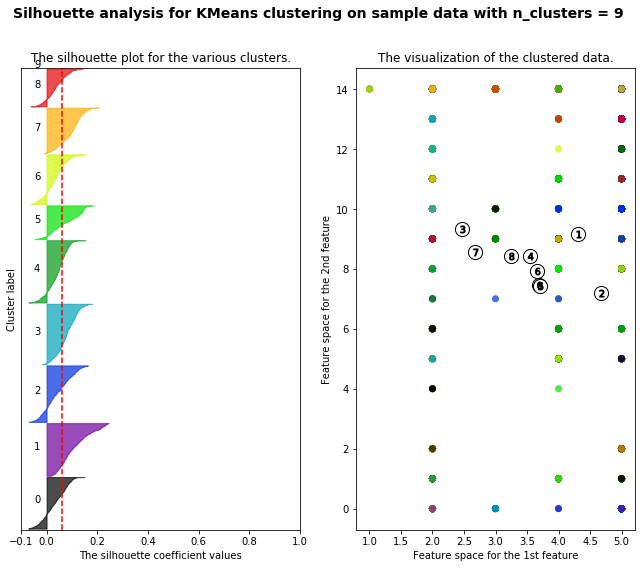

In [21]:
#your code here

ms_kmeans_nine = KMeans(n_clusters=9, init='random', n_init=46, random_state=109).fit(df_sample)

silplot(df_sample.values, ms_kmeans_nine.labels_, ms_kmeans_nine, pointlabels=None)


(d) After analyzing the plots produced by all three of these measures, discuss the number of k-means clusters that you think is the best fit for this dataset. Defend your answer with evidence from the previous parts of this question, the three graphs produced here, and what you surmise about this dataset.

**response here**

Ideally there would be 5 neat clusters because they are testing out 5 hand motions. However, there may be variations due to hand size or movement style by the different users. By this logic, less than 5 clusters does not make sense because we know the users were trying to do 5 different hand motions, but more could be possible. 


<br>
The gap statistic suggests 9 clusters as the point where performance isn't increased with more clusters. The elbow curve has a long turn, so I could see 9 being a possible value in this as well. The silhouette score appears to be best for 5 clusters, but there isn't a significant dropoff if we go with 9 clusters. To verify, I would look at how these 9 clusters correspond with the user groups. 

<div class='exercise'> <b> Problem 3: Alternative Algorithms  </b> </div>

(e) Run DBSCAN on the data. How many clusters are found, and how well does this clustering perform on e.g. silhouette score, excluding the points not assigned to any cluster?  
*Note*: Do not use a sample of the data. Running the algorithm may take up to 5-10 minutes.

In [22]:
from sklearn.neighbors import NearestNeighbors

# x-axis is each individual data point, numbered by an artificial index
# y-axis is the distance to its 2nd closest neighbor
def plot_epsilon(df, min_samples):
    fitted_neigbors = NearestNeighbors(n_neighbors=min_samples).fit(df)
    distances, indices = fitted_neigbors.kneighbors(df)
    dist_to_nth_nearest_neighbor = distances[:,-1]
    plt.plot(np.sort(dist_to_nth_nearest_neighbor))
    plt.xlabel("Index\n(sorted by increasing distances)")
    plt.ylabel("{}-NN Distance (epsilon)".format(min_samples-1))
    plt.tick_params(right=True, labelright=True)

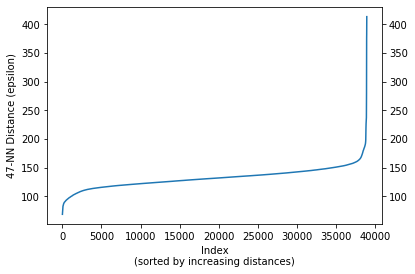

In [23]:
plot_epsilon(df, 48) #want to use min neighbors as twiice number of features


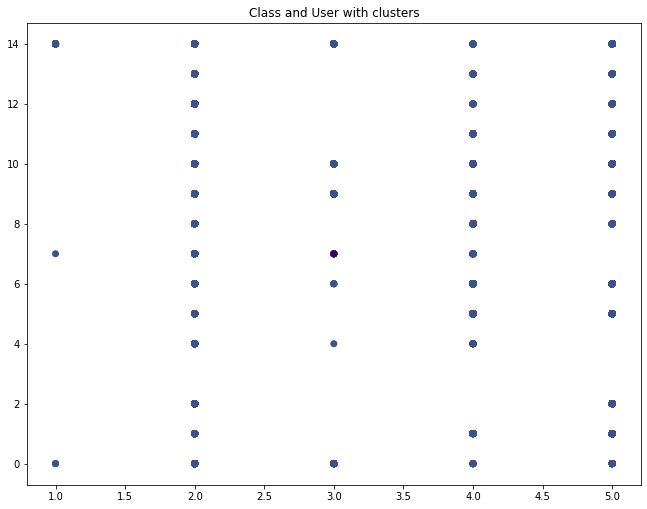

In [24]:
#your code here
from sklearn.cluster import DBSCAN
plt.figure(figsize=(11,8.5))
plt.title("Class and User with clusters")
fitted_dbscan = DBSCAN(eps=150).fit(df)
plt.scatter(df['Class'],df['User'], c=fitted_dbscan.labels_);

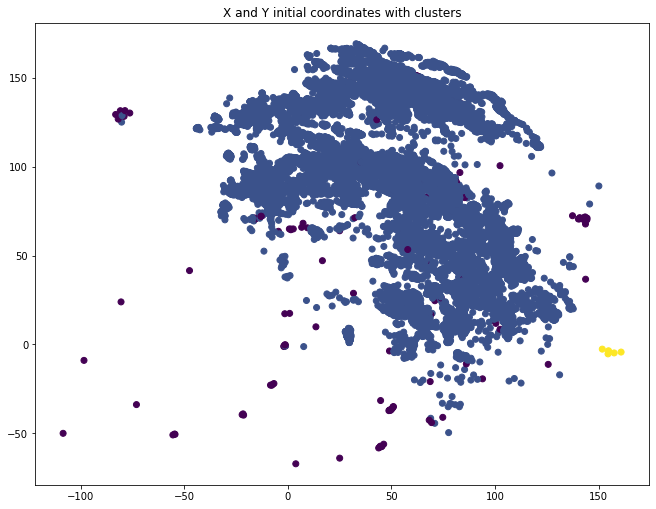

In [25]:
plt.figure(figsize=(11,8.5))
plt.title("X and Y initial coordinates with clusters")
plt.scatter(df['X0'],df['Y0'], c=fitted_dbscan.labels_);

In [26]:
#code modified from https://kite.com/python/answers/how-to-count-frequency-of-unique-values-in-a-numpy-array-in-python
(unique, counts) = np.unique(fitted_dbscan.labels_, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   -1   251]
 [    0 38680]
 [    1     2]
 [    2     5]
 [    3     5]]


In [27]:
silhouette_score(df, fitted_dbscan.labels_)

0.04740271519699833

How many clusters are found, and how well does this clustering perform on e.g. silhouette score, excluding the points not assigned to any cluster?

**your response**
Supposedly, there are 5 clusters that are identified by the dbscan. The vast majority show up in one cluster, and some outliers are put into 4 other categories. There is not great differentiation, and it does not align well with the 5 hand movements that we are ideally looking for. The silhoouette score is lower than the othere methods used.

(f) Hierarchical clustering. Run agglomerative clustering (using Ward's method), and plot the result using a dendrogram. Interpret the results, and describe the cluster size(s) the plot suggests. What level of aggregation is suggested by the sihoutte score?

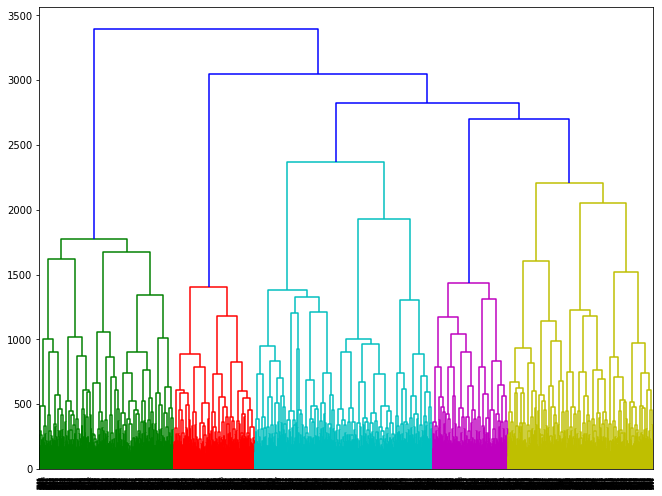

In [29]:
#your code here
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist

plt.figure(figsize=(11,8.5))
dist_mat = pdist(df_sample, metric="euclidean")
ward_data = hac.ward(dist_mat)

hac.dendrogram(ward_data);

**your response here**

There are 6 groups highlighted by the dendrogram model using the sample. You can see some subgroups that could potentially be broken out, but 6 looks to be a fair cutoff point. If you have a stricter cutoff point then you risk isolating small groups that may be well related to nearby ones. 

In [31]:
ward_dist=hac.fcluster(ward_data,t=2000,criterion='maxclust')
silhouette_score(df_sample,ward_dist,metric='euclidean')

0.13365274526469728

**your response here**

This actually gives us the highest and best silhouette score out of any clustering method that we have used so far. 

(g) Overall, what do you conclude about the number and kind of clusters in this data set?

**your response here**

To start, I would want to watch people doing the hand movements to feel better about my conclusions. The major distinction is whether we think that the 5 clusters are working well to capture the 5 hand movements. This doesn't seem to be the case, so we need to expand our thinking on clustering. The big issue here is that our data needs to be resampled so that we can get more observations using the fist. We only have 52 out of 38,000, which is skewing our data. We might be able to bootstrap to help somewhat, but this would be a big change that would likely bias our data. 


Based on current data, I would feel semi-confident that our best number of clusters is somewhere between 6 and 10, but the analyses done in this notebook suggest that there are conflicting results about the optimal cluster number. Without significant resampling, we aren't likely to get the fist covered as a cluster unless we use a major number of clusters.



In terms of the kind of clustering technique to use, I believe the Ward distance method using hierarchical clustering would provide our best clusters as a starting point. However, I would want to better understand the users and possible discrepancies to add in some more features so that we could improve model performance. 